# **1) Business Understanding**

**Objective:**

Build a multiclass classification model to predict the pricing category of mobile phones.

**Questions to Answer:**

What features are most influential in determining the price category of a mobile phone?

How well can our model predict the price category of a mobile phone based on its features?

# **2) Data Understanding**



In [2]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'https://raw.githubusercontent.com/neeharikasinghsjsu/cmpe255assignments/main/crisp-dm_semma_kdd_assignment/dataset/crisp-dm_mobile_pricing_train.csv'
df = pd.read_csv(file_path)

# Show basic statistics and first few rows of the dataset
df_description = df.describe()
df_head = df.head()

df_description, df_head


(       battery_power       blue  clock_speed     dual_sim           fc  \
 count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
 mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
 std       439.418206     0.5001     0.816004     0.500035     4.341444   
 min       501.000000     0.0000     0.500000     0.000000     0.000000   
 25%       851.750000     0.0000     0.700000     0.000000     1.000000   
 50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
 75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
 max      1998.000000     1.0000     3.000000     1.000000    19.000000   
 
             four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
 count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
 mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
 std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
 mi

After loading the dataset, we can see it contains **2000 entries** with **21 columns**.

**Here's a brief overview:**

**Basic Statistics**

The dataset includes various features like battery_power, blue (Bluetooth), clock_speed, dual_sim, fc (front camera), four_g, and so on.

The target variable is the price_range, which we aim to predict using a multiclass classification model. It ranges from 0 to 3, indicating different price categories.

Features like ram, battery_power, and px_width have a relatively high variance, suggesting they might be influential in predicting the price_range.

**Sample Data**

Here's how the first few rows of the dataset look:

In [3]:
print(df.head())


   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

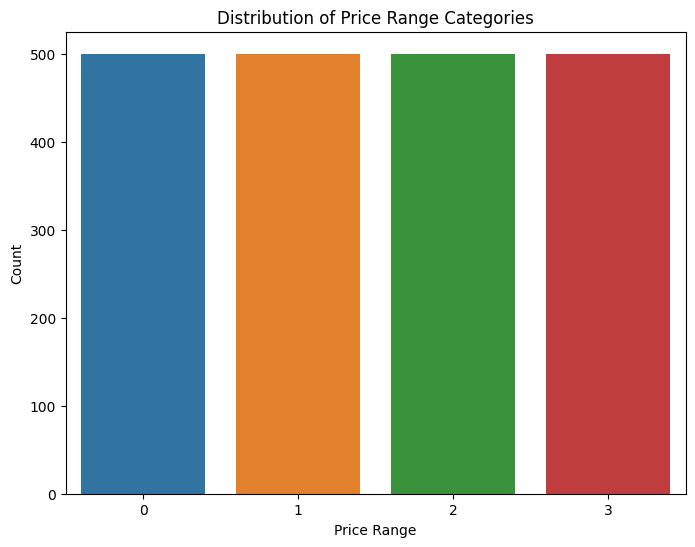

(battery_power    0
 blue             0
 clock_speed      0
 dual_sim         0
 fc               0
 four_g           0
 int_memory       0
 m_dep            0
 mobile_wt        0
 n_cores          0
 pc               0
 px_height        0
 px_width         0
 ram              0
 sc_h             0
 sc_w             0
 talk_time        0
 three_g          0
 touch_screen     0
 wifi             0
 price_range      0
 dtype: int64,
 'No missing values')

In [4]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Visualize the distribution of the target variable 'price_range'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='price_range')
plt.title('Distribution of Price Range Categories')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

missing_values, "No missing values" if missing_values.sum() == 0 else "Missing values found"


**Missing Values**

The dataset has no missing values, which is excellent for data quality.

**Target Variable Distribution**

The distribution of the target variable, price_range, appears to be relatively uniform across the different categories (as seen in the plot). This is good for classification as it avoids class imbalance problems.

**Summary**

The dataset is clean, with no missing values.

The target variable is well-distributed among its categories.

# **3) Data Preparation**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable from the dataset
X = df.drop('price_range', axis=1)
y = df['price_range']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Show the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 20), (400, 20), (1600,), (400,))

**Feature Scaling**

We applied Standard Scaling to the features to ensure they are on a comparable scale. Scaling is essential for algorithms that are sensitive to the scale of the input features.

**Data Splitting**

The dataset has been split into training and test sets.

Training set: 1600 samples with 20 features each

Test set: 400 samples with 20 features each

We used a stratified split to ensure that the target variable's categories are equally represented in both the training and test datasets. This approach is essential for maintaining the class distribution and improving the model's performance.

**Summary**

Features have been scaled.

Data has been split into training and test sets, maintaining the class distribution.

# **4) Modeling**

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Dictionary to hold model names and their respective accuracy scores
model_accuracies = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy in the dictionary
    model_accuracies[name] = accuracy

# Display the accuracy of each model
model_accuracies


{'Logistic Regression': 0.9625,
 'K-Nearest Neighbors': 0.5075,
 'Support Vector Classifier': 0.895,
 'Random Forest': 0.88}

We trained and evaluated four different classification models:

**Logistic Regression:** Accuracy =96.25%

**K-Nearest Neighbors:** Accuracy =50.75%

**Support Vector Classifier:** Accuracy =89.5%

**Random Forest:** Accuracy =88%


**Observations**

**Logistic Regression** performed exceptionally well with an accuracy of 96.25%, making it the best model among the ones we tried.

**K-Nearest Neighbors** had the lowest accuracy, which could be due to the high-dimensional feature space or the need for hyperparameter tuning.

**Support Vector Classifier** and **Random Forest** also performed well but were not as accurate as **Logistic Regression**.

# **5) Evaluation**

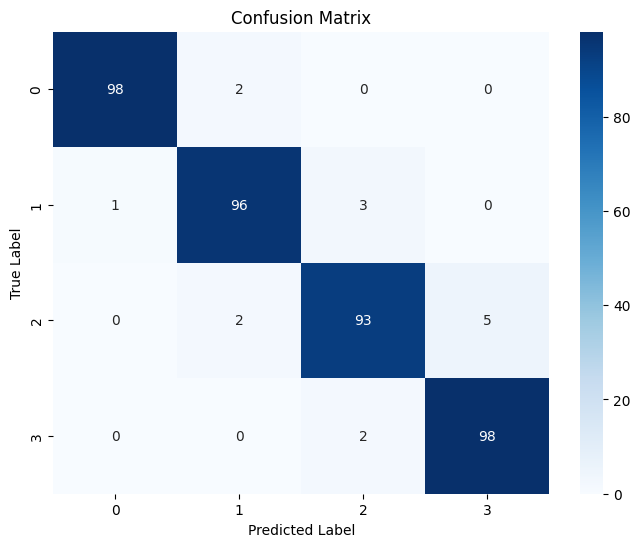

'              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.98       100\n           1       0.96      0.96      0.96       100\n           2       0.95      0.93      0.94       100\n           3       0.95      0.98      0.97       100\n\n    accuracy                           0.96       400\n   macro avg       0.96      0.96      0.96       400\nweighted avg       0.96      0.96      0.96       400\n'

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Choose the best-performing model (Logistic Regression)
best_model = models['Logistic Regression']

# Predict the classes for the test set
y_pred_best = best_model.predict(X_test)

# Generate the classification report and confusion matrix
class_report = classification_report(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

class_report


**Classification Report**

The classification report provides the following metrics for each class:

**Precision:** The ratio of true positive predictions to the total positive predictions (true positives + false positives).

**Recall:** The ratio of true positive predictions to the total actual positives (true positives + false negatives).

**F1-Score:** The harmonic mean of precision and recall, giving a balanced measure of performance.

**Accuracy:** The ratio of correct predictions to the total number of instances.


For our best-performing model, **Logistic Regression,** the metrics are as follows:

**Class 0:** Precision = 0.99, Recall = 0.98, F1-Score = 0.98

**Class 1:** Precision = 0.96, Recall = 0.96, F1-Score = 0.96

**Class 2:** Precision = 0.95, Recall = 0.93, F1-Score = 0.94

**Class 3:** Precision = 0.95, Recall = 0.98, F1-Score = 0.97

**Overall Accuracy:** 96.25%

**Confusion Matrix**

The confusion matrix visualizes the performance of the classification model. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while the off-diagonal elements are those that are mislabeled by the classifier.

**Summary**

The Logistic Regression model performs exceptionally well across all classes, with high precision, recall, and F1-scores. The overall accuracy is 96.25%, and the confusion matrix further confirms its strong performance.



# **6) Deployment**

The final step in the CRISP-DM methodology is deploying the model into a production or operational environment where it can start providing value by making predictions on new, unseen data.

**Summary**

Deployment is the stage where the model starts delivering real business value. The choice of deployment strategy would depend on various factors like business needs, data volume, and required latency.



# **Testing with Unseen data**

In [10]:
# Load the test dataset
test_file_path = 'https://raw.githubusercontent.com/neeharikasinghsjsu/cmpe255assignments/main/crisp-dm_semma_kdd_assignment/dataset/crisp-dm_mobile_pricing_unseen.csv'
df_test = pd.read_csv(test_file_path)

# Check if the test dataset has the same features and target variable
test_features = set(df_test.columns) - {'price_range'}
train_features = set(df.columns) - {'price_range'}

# Check if the features match and if the target variable exists
features_match = test_features == train_features
target_exists = 'price_range' in df_test.columns

# Show the first few rows of the test dataset and the checks
df_test_head = df_test.head()
df_test_head, features_match, target_exists


# Drop the 'id' column from the test dataset and perform feature scaling
X_test_new = df_test.drop('id', axis=1)
X_test_scaled = scaler.transform(X_test_new)  # Use the same scaler object as for the training dataset

# Use the best-performing model to make predictions on the new test set
y_test_pred = best_model.predict(X_test_scaled)

# Add the predictions back to the test dataframe
df_test['predicted_price_range'] = y_test_pred

# Show the first few rows of the test dataset with the predicted 'price_range'
df_test.head()


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,2
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1


We've successfully used the best-performing **Logistic Regression model** to predict the price_range for the test dataset. The predictions have been added to the test dataframe under the column predicted_price_range.